# Regression Analysis


In this assignment you will train a model for a regression problem based on linear regression with polynomial feature extension. You are not allowed to use sklearn or any existing python libraries that implements Linear or Polynomial Regresssion in any form. You are expected to write the source code by yourselves, including the gradient descent algorithm. 


## Dataset
You are given a 1D dataset and the ground truth targets for the regression in train.csv file. You are also provided with test.csv file for the model evaluations. Do not use any data from the test data in your model trainings. 

## Requirements
Include all the source codes in the following cells; make sure that the codes are sufficiently documented in each section. After training your model, provide regression plots for the train and test data (separately) as well. Report your MSE and average Root Mean Square Error that you obtain using the test data in the Report Section (below). Also, provide all the hyperparameters and their values following the source codes in seperate cells.

Connect gdrive for train/test dataset:

In [1]:
from google.colab import drive # import lib
drive.mount("/content/gdrive") # mount gdrive

Mounted at /content/gdrive


Import libraries:

In [2]:
import numpy as np # for np array ops
import matplotlib.pyplot as plt # for visualization purposes
from pandas import * # for array ops

Read .csv from gdrive and parse "x" and "t" into two lists:

Length of Training Data:  150
Train data visualized (x axis: X, y axis: T:
Length of Test Data:  100
Test data visualized (x axis: X, y axis: T:


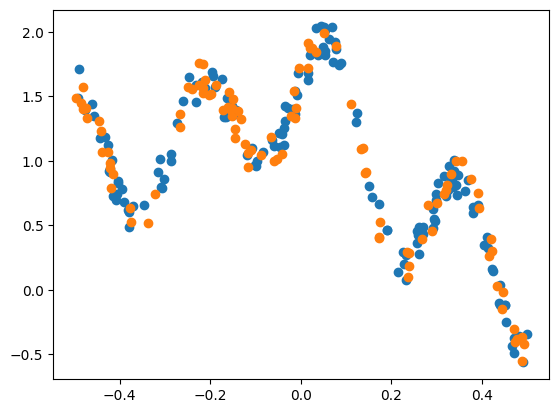

In [3]:
sTrainAdd = "/content/gdrive/MyDrive/cmp712/hw1/train.csv" # address of train.csv on gdriveg
sTestAdd  = "/content/gdrive/MyDrive/cmp712/hw1/test.csv" # address of test.csv on gdriveg
data = read_csv(sTrainAdd) # read train.csv
X = data['x'] # assign dataset argument into X
#vIdx = sorted(range(len(X)), key=lambda k: X[k])
#X = X[vIdx]
#min_x = min(X)
#X = X - min_x
#X.sort_values(ascending=True)
T = data['t'] # assign dataset value into T
#T = T[vIdx]
TRAIN_DATASET_LENGTH = len(X) # get length of dataset

data_test = read_csv(sTestAdd) # read train.csv
X_test = data_test['x']
#vIdx_test = sorted(range(len(X_test)), key=lambda k: X_test[k])
#X_test = X_test[vIdx_test]
#min_x_test = min(X_test)
#X_test = X_test - min_x_test
#X_test.sort_values(ascending=True)
T_test = data_test['t'] # assign dataset value into T
#T_test = T_test[vIdx_test]
TEST_DATASET_LENGTH = len(X_test) # get length of dataset


print('Length of Training Data: ', TRAIN_DATASET_LENGTH)
print('Train data visualized (x axis: X, y axis: T:')
plt.scatter(X, T) # check if data is ok
print('Length of Test Data: ', TEST_DATASET_LENGTH)
print('Test data visualized (x axis: X, y axis: T:')
plt.scatter(X_test, T_test) # check if data is ok

**updateParams**, **calcDeriv** and **calcPoly** methods are created in order to set a generic structure for testing different order polynomials:

Generic method to calculate partial derivatives of MSE loss function wrt to polynomial parameters:

In [30]:
def calcLossPartialDeriv(T_truth, T_Pred, x, nOrder):
  res = (-2) * (T_truth - T_Pred) * x**nOrder
  return res

Generic method to calculate different order polynomials:

In [5]:
def calcPoly(x, params):
  sum = 0
  nOrder = len(params) - 1
  for n in range(0, len(params)):
    sum += params[n] * np.power(x, nOrder - n)
  return sum

Loss Function is Mean Squared Error **(MSE)**:

In [6]:
def calcLoss(truth, pred, vParams, nReg):
  loss = 1/truth.size * np.sum(np.power(truth - pred, 2)) + nReg * sum(vParams)/len(vParams)
  return loss

Trainer method:

In [70]:
def trainer(X, T, nLearningRate, nPolyOrder, nLossLim, nIterLim, nReg):
  vLoss_training = np.zeros(nIterLim)
  vT_Pred = np.zeros(TRAIN_DATASET_LENGTH)
  vLoss_test = np.zeros(nIterLim)
  vPolyParams = np.zeros(nPolyOrder + 1) # Polynomial constants stored in np array
  vLossPartialDerivs = np.zeros(nPolyOrder + 1) # Partial derivatives of loss function stored in np array
  nIter = 0 # Iteration counter
  nLoss_training = 999999 # Used for exit condition of minimum loss, initially set to a large number
  nLoss_test = 0
  while (nIter<nIterLim): # train until loss decreases to a certain value or number of iterations reached
    for idx in range(TRAIN_DATASET_LENGTH):
      T_Pred = calcPoly(X[idx], vPolyParams) # calculate predictor's values
      #nLoss_training = calcLoss(T[idx], T_Pred, vPolyParams, nReg) # calculate loss
      # save loss in ITERxDATALENGTH matrix
      for i in range(0, nPolyOrder+1): # calculate derivatives and update parameters
        vLossPartialDerivs[i] = calcLossPartialDeriv(T[idx], T_Pred, X[idx], nPolyOrder-i) # calculate partial derivatives
      vPolyParams = vPolyParams - nLearningRate * vLossPartialDerivs
    nIter = nIter + 1
    if(nIter%(nIterLim * 0.1)==0):
        vT_Pred = calcPoly(X, vPolyParams)
        vLoss_training = calcLoss(T, vT_Pred, vPolyParams, nReg)       
        print("progress: %", nIter/nIterLim * 100, "Training Loss=", vLoss_training, "Params=", vPolyParams)
        #print("progress:", nIter/nIterLim*100, "Test Loss=", nLoss_test)    
  return vPolyParams, vLoss_training

Trainer wrapper:

In [73]:
# Hyperparam.s:
LEARNING_RATE = 0.2
REGULARIZATION = 0 #0.2
POLY_ORDER = 13
LIM_LOSS = 0.000001
LIM_ITER = 10000
#vPolyParams, vLoss_training, vLoss_test = trainer(X, T, LEARNING_RATE, POLY_ORDER, LIM_LOSS, LIM_ITER, REGULARIZATION)
vPolyParams, vLoss_training = trainer(X, T, LEARNING_RATE, POLY_ORDER, LIM_LOSS, LIM_ITER, REGULARIZATION)
print(vPolyParams)

progress: % 10.0 Training Loss= 0.12161255387258829 Params= [-0.08495626  0.07473974 -0.33624639  0.30904734 -1.24662344  1.26230845
 -4.01473468  4.97559615 -8.89484923 16.50446723 -2.58689987 -8.43177744
 -0.25274615  1.45301743]
progress: % 20.0 Training Loss= 0.11910435381004433 Params= [ -0.16130691   0.07559554  -0.63775666   0.31548414  -2.35698937
   1.32685163  -7.52004077   5.58878966 -16.05228725  20.86752676
  -0.50076706  -9.35686806  -0.34244377   1.46818413]
progress: % 30.0 Training Loss= 0.11748438892587795 Params= [ -0.2323538    0.05957068  -0.91890249   0.25195363  -3.39343996
   1.11048892 -10.78650865   5.15853929 -22.64566647  22.20616179
   1.54171519  -9.59951843  -0.45260191   1.46845028]
progress: % 40.0 Training Loss= 0.11616377452457897 Params= [ -0.29840208   0.04018853  -1.1808178    0.17397376  -4.35983611
   0.83395497 -13.82567933   4.49656567 -28.70486603  22.8502529
   3.44795429  -9.68692878  -0.56018076   1.4656193 ]
progress: % 50.0 Training Loss=

Visualize Training Data Result:

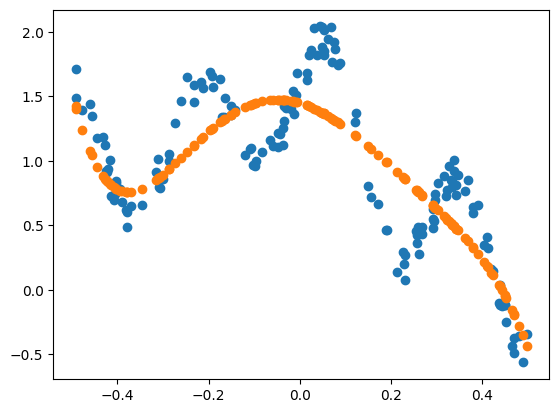

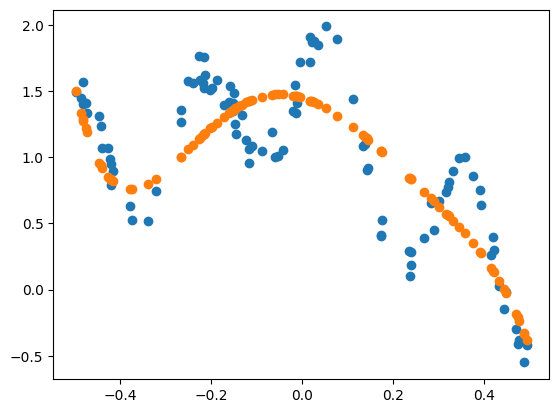

In [74]:
vIdx = sorted(range(len(X)), key=lambda k: X[k])
X = X[vIdx]
T_Pred = calcPoly(X, vPolyParams)
T_Pred = T_Pred[vIdx]
T = T[vIdx]
vIdx_test = sorted(range(len(X_test)), key=lambda k: X_test[k])
X_test = X_test[vIdx_test]
T_Pred_test = calcPoly(X_test, vPolyParams)
T_Pred_test = T_Pred_test[vIdx_test]
T_test = T_test[vIdx_test]
plt.figure()
plt.scatter(X, T) 
plt.scatter(X, T_Pred)
plt.figure()
plt.scatter(X_test, T_test)
plt.scatter(X_test, T_Pred_test)

Plot Losses:

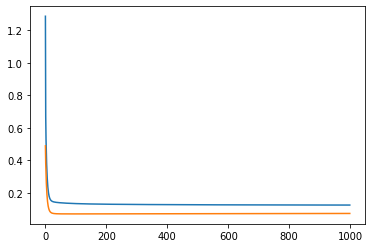

In [ ]:
plt.plot(vLoss_training)
plt.plot(vLoss_test)

# Report
Write your test results and utilized hyperparameter parameter values in this section. Briefly discuss how your algorithm works; and why it works as it is.